# Implementing Simple Linear regression 
Python implementation of the linear regression exercise from Andrew Ng's course: Machine Learning on coursera.
Exercise 1

Source notebooks: 
[1][1] 
[2][2] 
[3][3] 
[4][4] 

[1]:https://github.com/kaleko/CourseraML/blob/a815ac95ba3d863b7531926b1edcdb4f5dd0eb6b/ex1/ex1.ipynb

[2]:http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb

[3]:http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb

[4]:http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb

In [1]:
import os
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
data_path = '/Users/User/Desktop/Computer_Science/stanford_ml/machine-learning-ex1/ex1'
os.chdir(data_path)

# Loading data set and formating data 

In [33]:
#Reading data file and shape
data = pd.read_csv('ex1data1.txt', header = None)
m,n = data.shape

#Initializing X and Y according to shape and converting to numpy arrays
X = data.iloc[:,0:n-1].values
y = data.iloc[:,n-1:n].values

#Adding the columns of 1s to X 
X = np.concatenate((np.ones((m,1)),X), axis = 1)

#Initializing theta
theta = np.zeros((n,1),dtype = 'int8')

## Plotting the data 

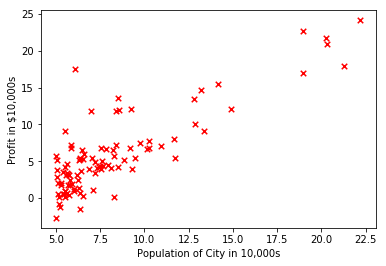

In [15]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

# Cost Function computation
$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 $

$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y) $ (vectorized version)

## Gradient descent computation
$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T(X\theta - y) $ 


In [16]:
theta = np.zeros((n,1),dtype = 'int8')

def cost_function(X,y,theta):
    #Initialisation of useful values 
    m = np.size(y)
    J = 0
    
    #Hypothesis function in vectorized form
    h = np.dot(X,theta)

    #Cost function in vectorized form
    J = float((1./(2*m)) * np.dot((h - y).T, (h - y)));    
    return J;

def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    J_vec = []  #Used to plot the cost function convergence
    thetahistory = [] #Used for three d plot of convergence

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Calculating the grad function in vectorized form
        theta = theta - alpha * (1/m)* (X.T.dot(h-y))
        J_history[i] = cost_function(X,y,theta)
        
        #Calculate the cost for each iteration(used to plot convergence)
        J_vec.append(cost_function(X,y,theta))
        thetahistory.append(list(theta[:,0]))
    
    return theta,J_history,J_vec, thetahistory;

def grad_descent_loop(X,y,theta,alpha = 0.015,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    theta0 = 0
    theta1 = 0
    h = 0

    for _ in range(num_iters):
        grad0,grad1 = 0,0

        for i in range(m):
            h = theta0 + theta1 * X[:,1][i]
            grad0 += (h - y[i])
            grad1 += (h - y[i]) * X[:,1][i]
    
        #Calculating the grad function in vectorized form 
        theta0 = theta0 - alpha * (1./m)* grad0
        theta1 = theta1 - alpha * (1./m)* grad1
         
    return np.array([theta0, theta1])
    

In [17]:
grad_descent_loop(X, y,theta)

array([[-3.63061572],
       [ 1.16639493]])

## Run gradient descent 

In [61]:
theta_calc , Cost_J, J_vec,thetahistory = gradient_descent(X, y,theta)
theta_calc
#gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):

array([[-0.26292309],
       [ 0.82807367]])

## Plot convergence

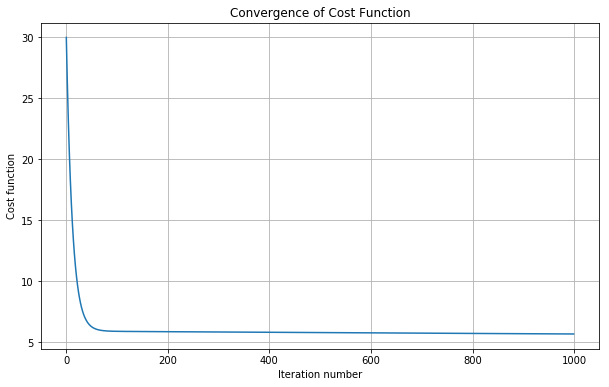

In [63]:
def plot_convergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec)
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    
plot_convergence(J_vec)

## Fit regression line to data
Prediction = $h_\theta(x)=\theta_0 + \theta_1x$


In [64]:
def prediction(X,theta):
    y_pred = theta[0] + theta[1] * X[:,1]
    return y_pred;

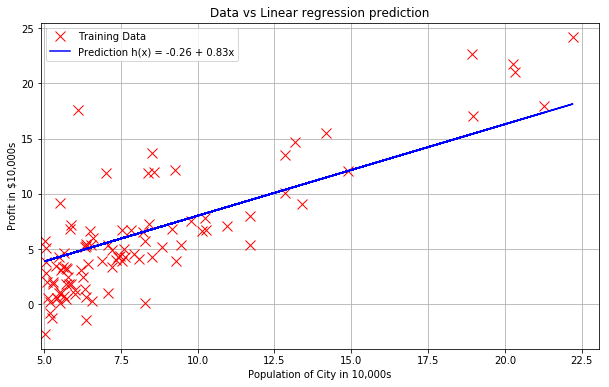

In [65]:
#Calculating prediction
y_pred = X @ theta_calc

#Plotting figure
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],y_pred,'b-', label = 'Prediction h(x) = %0.2f + %0.2fx'%(theta_calc[0],theta_calc[1]))
plt.title('Data vs Linear regression prediction')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.xlim(4.9)
plt.grid()
plt.legend()

## Visualizing the cost minimization path of gradient descent
Source: https://github.com/kaleko/CourseraML/blob/a815ac95ba3d863b7531926b1edcdb4f5dd0eb6b/ex1/ex1.ipynb

In [66]:
theta_calc , Cost_J, J_vec,thetahistory = gradient_descent(X, y,np.array([0,0]).reshape(-1,1), alpha = .0005, num_iters = 10000 )
theta_calc
#gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):

array([[-2.2816205 ],
       [ 1.03087373]])

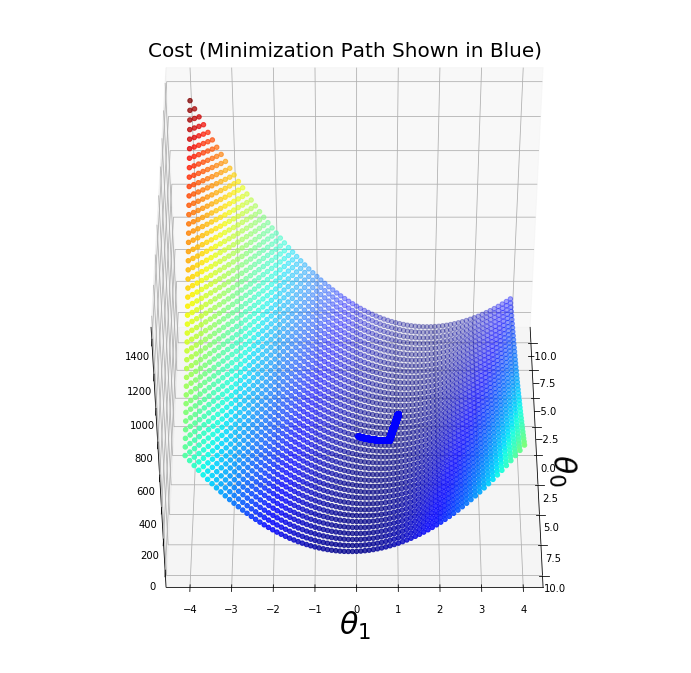

In [67]:

#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-4,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(cost_function(X,y,np.array([[david], [kaleko]])))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap='jet')

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=20)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],J_vec,'bo-')
ax.view_init(45, 0)

plt.show()